In [1]:
import os
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, "..", ".."))
sys.path.append(parent_dir)

# from sega_learn.neural_networks import *

# print(f"Working directory: {notebook_dir}")
# print(f"Parent directory: {parent_dir}")

In [3]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [4]:
from test_nn import *
from test_nn_cupy import *
from test_nn_numba import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [5]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 100_000

# Optimizer Timing
optt_layer_sizes_multiplier = 25

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 2
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000, 250_000, 500_000]

In [6]:
# Compile Numba functions
init_compile()

Compiling Numba functions:   0%|          | 0/31 [00:00<?, ?it/s]

#### Neural Network Timing

In [7]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nNumba NN Timing Implementation:")
nn_numba = time_nn_numba(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 0.756690 seconds ± 0.030111 seconds
apply_dropout       : 0.582858 seconds ± 0.024530 seconds
backward            : 0.749091 seconds ± 0.042925 seconds
calculate_loss      : 0.522445 seconds ± 0.028632 seconds
evaluate            : 0.400998 seconds ± 0.011765 seconds
train (X,y Reduced) : 0.989162 seconds ± 0.024692 seconds


CuPy NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 10 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 100,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std De

#### Optimizer Timing

In [8]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(
    num_repeats, optt_layer_sizes_multiplier
)

print("\n\nNumba NN Optimizer Implementation:")
nn_optimizer_times_numba = time_nn_optimizer_numba(
    num_repeats, optt_layer_sizes_multiplier
)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.018998 seconds ± 0.000975 seconds
SGD_initialize           : 0.010554 seconds ± 0.003189 seconds
Adadelta_initialize      : 0.026195 seconds ± 0.005726 seconds
----------------------------------------------------------------------
Adam_update              : 0.246550 seconds ± 0.001983 seconds
SGD_update               : 0.086498 seconds ± 0.001298 seconds
Adadelta_update          : 0.325494 seconds ± 0.013373 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 10 runs):
Performance for Layer sizes: [2500, 1875, 1250, 625]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [9]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(
    num_repeats, losst_layer_sizes_multiplier, losst_dataset_size
)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(
    num_repeats, losst_layer_sizes_multiplier, losst_dataset_size
)

print("\n\nNumba NN Loss Implementation:")
nn_loss_numba = time_nn_loss_numba(
    num_repeats, losst_layer_sizes_multiplier, losst_dataset_size
)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 2.409535 seconds ± 0.030047 seconds
BCEWithLogitsLoss        : 0.039198 seconds ± 0.005682 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 0.324134 seconds ± 0.047902 seconds
BCEWithLogitsLoss        : 0.004299 seconds ± 0.008910 seconds


Numba NN Loss Implementation:

Timing results for Loss functions (averaged over 10 runs)

#### Epoch Timings

In [10]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(
    num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False
)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(
    num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False
)

print("\n\nNumba NN Single Epoch Implementation:")
nn_epoch_numba = time_nn_epoch_numba(
    num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False
)

Base NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average Time (s) ±  Std Dev (s)
1,000               : 0.009598 seconds ± 0.002613 seconds
5,000               : 0.050976 seconds ± 0.009251 seconds
10,000              : 0.100776 seconds ± 0.007292 seconds
50,000              : 0.472481 seconds ± 0.016493 seconds
100,000             : 0.910519 seconds ± 0.026796 seconds
250,000             : 2.235220 seconds ± 0.041329 seconds
500,000             : 4.622607 seconds ± 0.070772 seconds


CuPy NN Single Epoch Implementation:

Timing results for NeuralNetwork train method (averaged over 10 runs):
Performance for Layer sizes: [200, 100, 20]
----------------------------------------------------------------------------------------------------
Dataset Size        : Average 

## Visualization of Neural Network Timing Results

### Setup

In [11]:
# Combine results from CPU, CuPy, and Numba
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])

    # Create DataFrame from collected results
    results = pd.DataFrame(
        combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"]
    )

    return results

In [12]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)
numba_results = combine_results(nn_numba, nn_optimizer_times_numba, nn_loss_numba)

In [13]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"
numba_results["Implementation"] = "Numba"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results, numba_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.756690,0.030111,CPU
1,apply_dropout,0.582858,0.024530,CPU
2,backward,0.749091,0.042925,CPU
3,calculate_loss,0.522445,0.028632,CPU
4,evaluate,0.400998,0.011765,CPU
5,train,0.989162,0.024692,CPU
6,Adam_initialize,0.018998,0.000975,CPU
7,Adam_update,0.246550,0.001983,CPU
8,SGD_initialize,0.010554,0.003189,CPU
9,SGD_update,0.086498,0.001298,CPU


In [14]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(
    index="Function", columns="Implementation", values="Average Time (s)"
).reset_index()
pivot_results["Speedup (%) CuPy"] = (
    (pivot_results["CPU"] - pivot_results["CuPy"]) / pivot_results["CPU"] * 100
)
pivot_results["Speedup (%) Numba"] = (
    (pivot_results["CPU"] - pivot_results["Numba"]) / pivot_results["CPU"] * 100
)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values("CPU", ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Numba,Speedup (%) CuPy,Speedup (%) Numba
5,CrossEntropyLoss,2.409535,0.324134,0.243483,86.547852,89.895026
13,train,0.989162,0.907974,0.424708,8.207773,57.063801
12,forward,0.756690,0.568341,0.817818,24.891198,-8.078329
9,backward,0.749091,0.199346,0.921922,73.388210,-23.072164
8,apply_dropout,0.582858,0.013999,0.582843,97.598153,0.002626
10,calculate_loss,0.522445,0.160955,0.503551,69.192064,3.616606
11,evaluate,0.400998,0.152097,0.497827,62.070519,-24.146776
1,Adadelta_update,0.325494,0.026098,0.084739,91.982110,73.965970
3,Adam_update,0.246550,0.034000,0.093992,86.209720,61.877199
7,SGD_update,0.086498,0.004300,0.043705,95.028808,49.473416


In [15]:
_nn_epoch_base = pd.DataFrame(
    nn_epoch_base, columns=["Dataset Size", "Average Time (s)", "Std Dev (s)"]
)
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(
    nn_epoch_cupy, columns=["Dataset Size", "Average Time (s)", "Std Dev (s)"]
)
_nn_epoch_cupy["Implementation"] = "CuPy"

_nn_epoch_numba = pd.DataFrame(
    nn_epoch_numba, columns=["Dataset Size", "Average Time (s)", "Std Dev (s)"]
)
_nn_epoch_numba["Implementation"] = "Numba"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy, _nn_epoch_numba])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.009598,0.002613,CPU
1,5000,0.050976,0.009251,CPU
2,10000,0.100776,0.007292,CPU
3,50000,0.472481,0.016493,CPU
4,100000,0.910519,0.026796,CPU
5,250000,2.235220,0.041329,CPU
6,500000,4.622607,0.070772,CPU
0,1000,0.028715,0.018750,CuPy
1,5000,0.060505,0.013903,CuPy
2,10000,0.105736,0.002652,CuPy


In [16]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams["axes.labelpad"] = 10
plt.rcParams["axes.titlepad"] = 15
plt.rcParams["font.family"] = "sans-serif"

### Visualizations

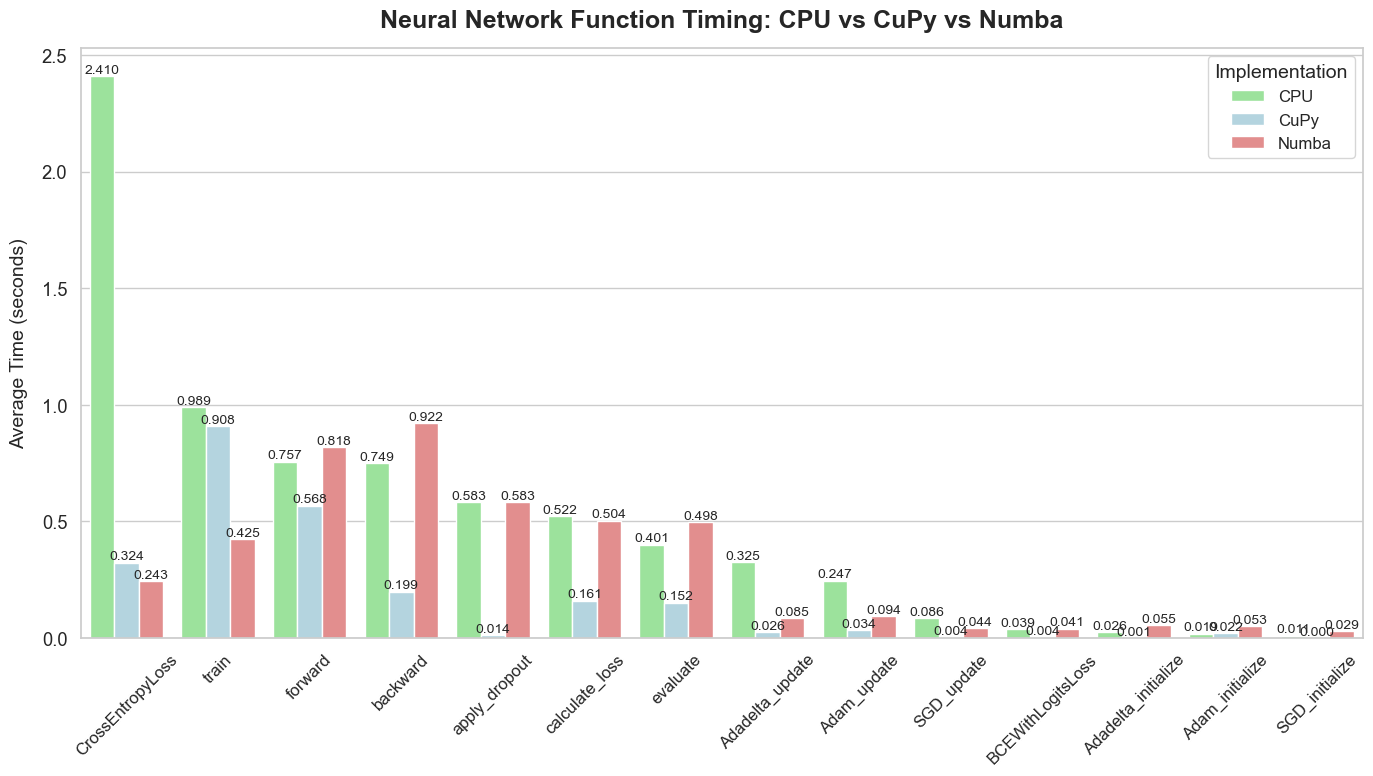

In [17]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(
    pivot_results, id_vars=["Function"], value_vars=["CPU", "CuPy", "Numba"]
)
melted_data.rename(columns={"variable": "Implementation"}, inplace=True)

sns.barplot(
    x="Function",
    y="value",
    hue="Implementation",
    data=melted_data,
    palette=["lightgreen", "lightblue", "lightcoral"],
)

plt.title(
    "Neural Network Function Timing: CPU vs CuPy vs Numba",
    fontsize=18,
    fontweight="bold",
)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.3f", fontsize=10)

plt.tight_layout()
plt.show()

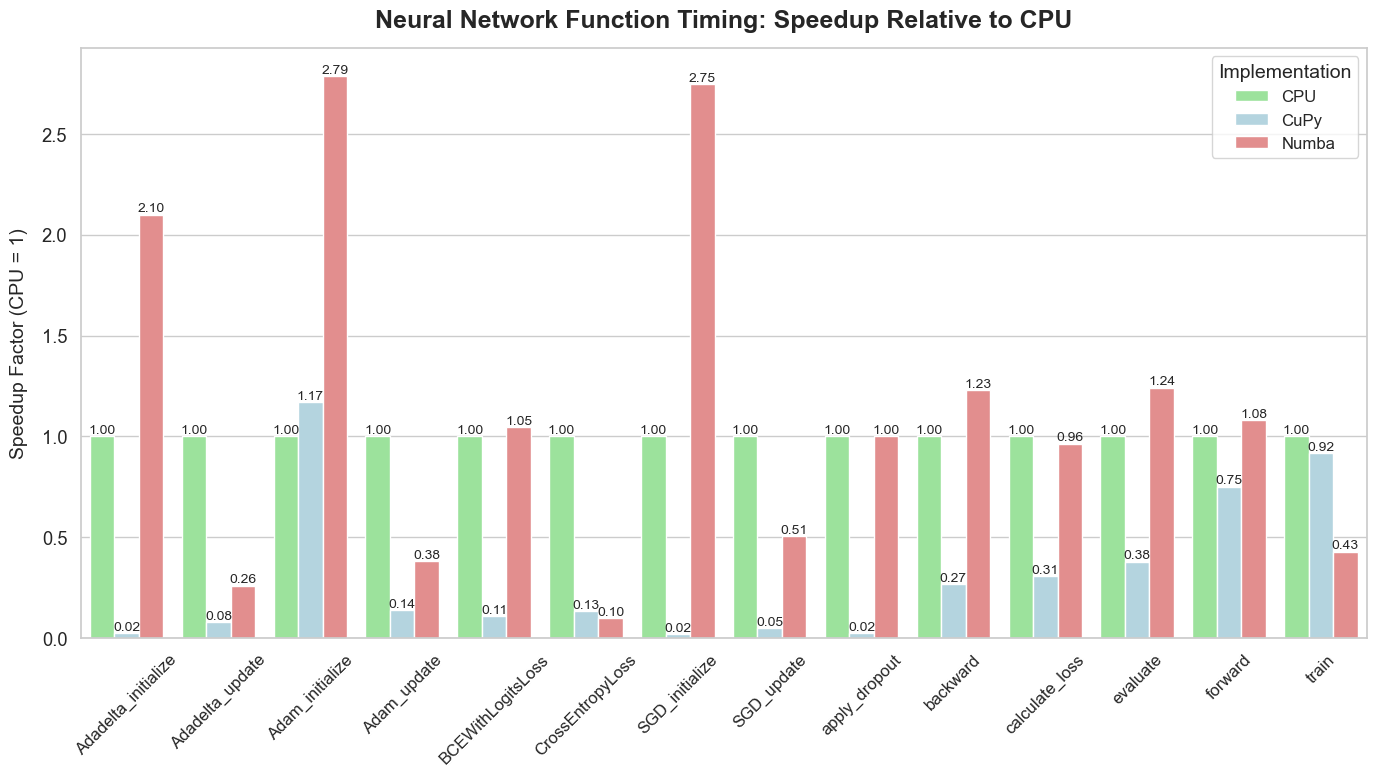

In [18]:
# Pivot the data so each function's timing for each implementation is in a separate column
df_pivot = melted_data.pivot(index="Function", columns="Implementation", values="value")

# Compute the speedup relative to CPU for each function.
# For CPU, speedup will always be 1 (since CPU_time/CPU_time == 1)
df_speedup = df_pivot.div(df_pivot["CPU"], axis=0)

# Melt back to long form for plotting
speedup_data = df_speedup.reset_index().melt(id_vars="Function", value_name="speedup")

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x="Function",
    y="speedup",
    hue="Implementation",
    data=speedup_data,
    palette=["lightgreen", "lightblue", "lightcoral"],
)

plt.title(
    "Neural Network Function Timing: Speedup Relative to CPU",
    fontsize=18,
    fontweight="bold",
)
plt.ylabel("Speedup Factor (CPU = 1)", fontsize=14)
plt.xlabel("")
plt.xticks(rotation=45, fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt="%.2f", fontsize=10)

plt.tight_layout()
plt.show()

In [19]:
print(epoch_results)

   Dataset Size  Average Time (s)  Std Dev (s) Implementation
0          1000          0.009598     0.002613            CPU
1          5000          0.050976     0.009251            CPU
2         10000          0.100776     0.007292            CPU
3         50000          0.472481     0.016493            CPU
4        100000          0.910519     0.026796            CPU
5        250000          2.235220     0.041329            CPU
6        500000          4.622607     0.070772            CPU
0          1000          0.028715     0.018750           CuPy
1          5000          0.060505     0.013903           CuPy
2         10000          0.105736     0.002652           CuPy
3         50000          0.500247     0.013362           CuPy
4        100000          0.987837     0.011019           CuPy
5        250000          2.498271     0.067398           CuPy
6        500000          5.027793     0.094459           CuPy
0          1000          0.006143     0.007048          Numba
1       

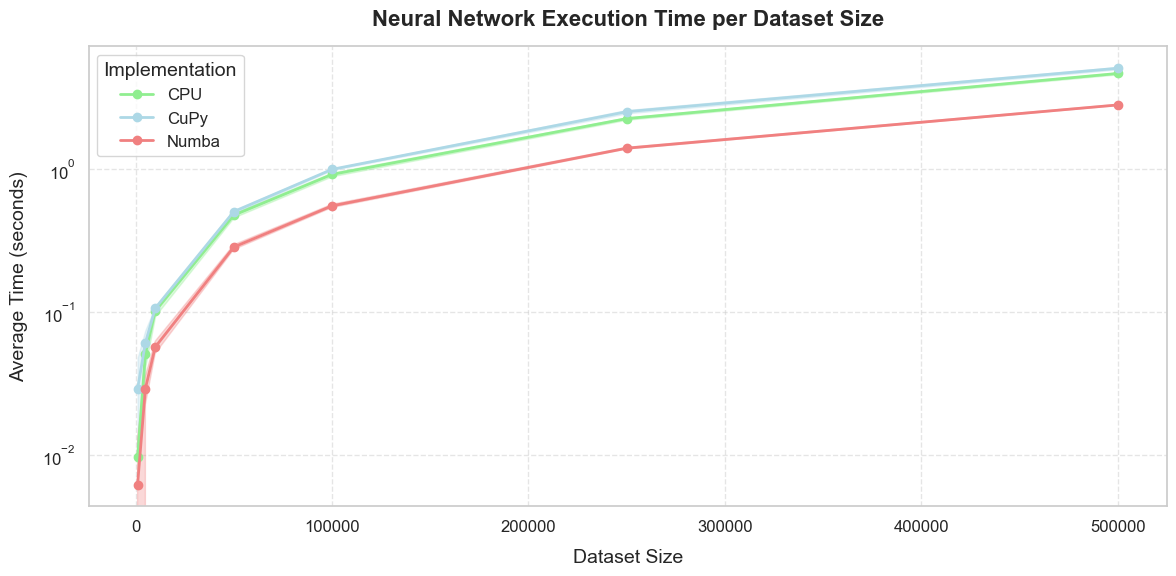

In [20]:
# Create the plot
plt.figure(figsize=(12, 6))
palette = {"CPU": "lightgreen", "CuPy": "lightblue", "Numba": "lightcoral"}

# Loop through each implementation and plot the line with its stddev as a shaded area
for impl in epoch_results["Implementation"].unique():
    df = epoch_results[epoch_results["Implementation"] == impl].sort_values(
        "Dataset Size"
    )
    plt.plot(
        df["Dataset Size"],
        df["Average Time (s)"],
        marker="o",
        color=palette.get(impl, "gray"),
        label=impl,
        linewidth=2,
    )
    plt.fill_between(
        df["Dataset Size"],
        df["Average Time (s)"] - df["Std Dev (s)"],
        df["Average Time (s)"] + df["Std Dev (s)"],
        color=palette.get(impl, "gray"),
        alpha=0.3,
    )

plt.title(
    "Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold"
)
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)
plt.yscale("log")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

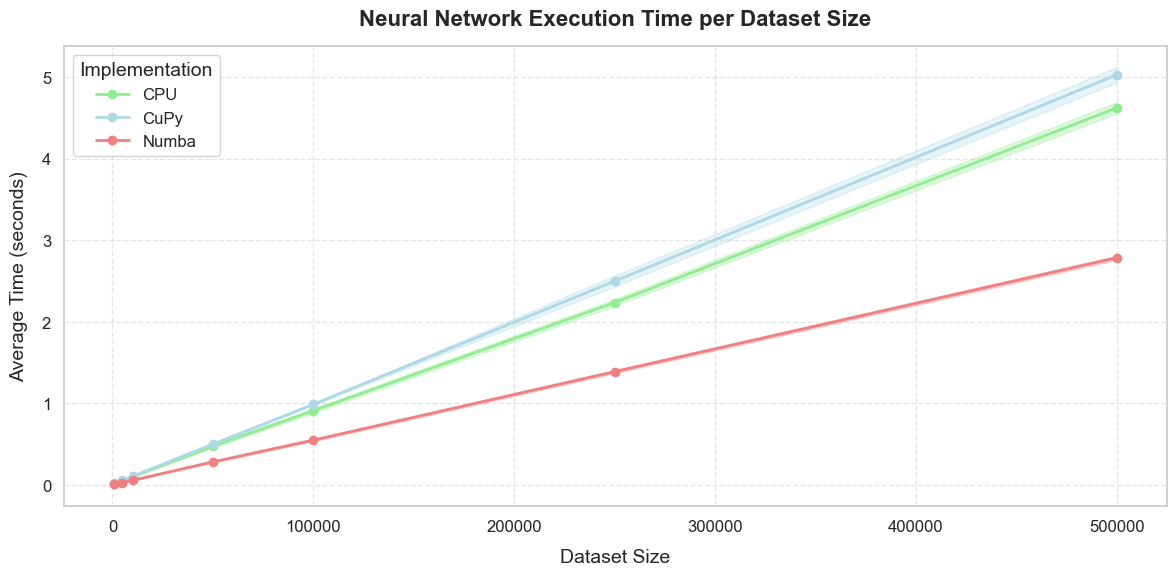

In [21]:
# Create the plot
plt.figure(figsize=(12, 6))
palette = {"CPU": "lightgreen", "CuPy": "lightblue", "Numba": "lightcoral"}

# Loop through each implementation and plot the line with its stddev as a shaded area
for impl in epoch_results["Implementation"].unique():
    df = epoch_results[epoch_results["Implementation"] == impl].sort_values(
        "Dataset Size"
    )
    plt.plot(
        df["Dataset Size"],
        df["Average Time (s)"],
        marker="o",
        color=palette.get(impl, "gray"),
        label=impl,
        linewidth=2,
    )
    plt.fill_between(
        df["Dataset Size"],
        df["Average Time (s)"] - df["Std Dev (s)"],
        df["Average Time (s)"] + df["Std Dev (s)"],
        color=palette.get(impl, "gray"),
        alpha=0.3,
    )

plt.title(
    "Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold"
)
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()